In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
from comparative_feret_algorithms import k_nearest_neighbours as knn

In [2]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

In [3]:
data1 = np.array([[1, 1], [1, 4], [2, 2], [2, 8], [2, 9], [3, 6], [3, 8], [3, 9], [4, 3], [4, 6], [4, 8], [7, 2], [7, 7], [7, 9], [9, 3], [10, 10]])
data2 = np.array([[1, 1], [1, 4], [2, 2], [4, 3], [4, 6], [4, 8], [7, 7], [7, 9], [10, 10]])

Text(0.5, 1.0, 'Initial data')

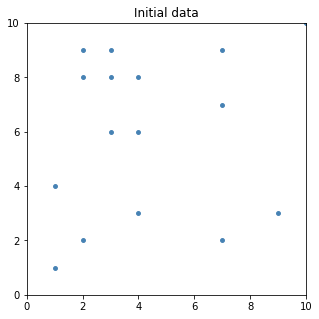

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(data1[:, 0], data1[:, 1], s=15, color='steelblue', alpha=1)
#plt.hlines(0, -3, 3, linestyle=':'); plt.vlines(0, -3, 3, linestyle=':')
plt.xlim(0, 10); plt.ylim(0, 10)
plt.title("Initial data")

Text(0.5, 1.0, 'Initial data')

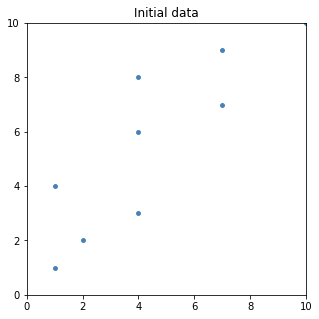

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(data2[:, 0], data2[:, 1], s=15, color='steelblue', alpha=1)
#plt.hlines(0, -3, 3, linestyle=':'); plt.vlines(0, -3, 3, linestyle=':')
plt.xlim(0, 10); plt.ylim(0, 10)
plt.title("Initial data")

In [6]:
query = np.array([10, 5])

In [7]:
nn = knn.kNN(data1, data1, euclidean, 1)
nn.construct_ball_tree()
found = nn.find_knn(5, query)

Text(0.5, 1.0, 'Query [10  5]')

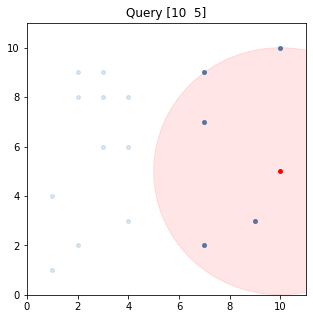

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(query[0], query[1], s=15, color='red')
plt.scatter(data1[:, 0], data1[:, 1], s=15, color='steelblue', alpha=0.2)
plt.scatter(found[:, 0], found[:, 1], s=15, color='steelblue')
radius = plt.Circle(query, euclidean(found[heapq.nlargest(1, range(len([euclidean(query, point) for point in found])), key=[euclidean(query, point) for point in found].__getitem__)], query), color='r', alpha=0.1)
plt.gcf().gca().add_artist(radius)
#plt.hlines(0, -3, 3, linestyle=':'); plt.vlines(0, -3, 3, linestyle=':')
plt.xlim(0, 11); plt.ylim(0, 11)
plt.title("Query " + str(query))

In [11]:
nn = knn.kNN(data2, data2, euclidean, 1)
nn.construct_ball_tree()
found = nn.find_knn(5, query)

Text(0.5, 1.0, 'Query [10  5]')

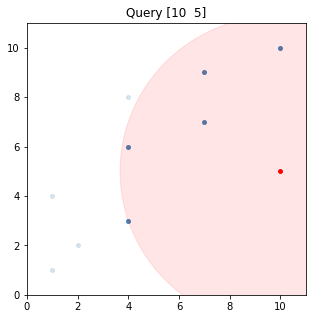

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(query[0], query[1], s=15, color='red')
plt.scatter(data2[:, 0], data2[:, 1], s=15, color='steelblue', alpha=0.2)
plt.scatter(found[:, 0], found[:, 1], s=15, color='steelblue')
radius = plt.Circle(query, euclidean(found[heapq.nlargest(1, range(len([euclidean(query, point) for point in found])), key=[euclidean(query, point) for point in found].__getitem__)], query), color='r', alpha=0.1)
plt.gcf().gca().add_artist(radius)
#plt.hlines(0, -3, 3, linestyle=':'); plt.vlines(0, -3, 3, linestyle=':')
plt.xlim(0, 11); plt.ylim(0, 11)
plt.title("Query " + str(query))

In [13]:
def draw_circles(bn):
    ball = plt.Circle(bn.pivot, bn.radius, color='r', alpha=.07)
    plt.scatter(bn.pivot[0], bn.pivot[1], color='green', alpha=0.2)
    plt.gcf().gca().add_artist(ball)
    if bn.is_leaf() == False:
        if bn.farthest_child != None:
            draw_circles(bn.farthest_child)
        if bn.closest_child != None:
            draw_circles(bn.closest_child)

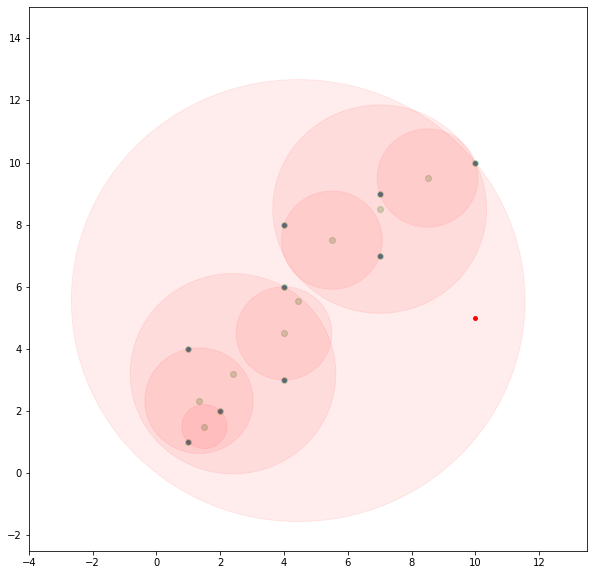

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(data2[:, 0], data2[:, 1], s=15, color='steelblue', alpha=1)
plt.xlim(-4, 13.5); plt.ylim(-2.5, 15)
plt.scatter(query[0], query[1], s=15, color='red')

bn = nn.ball_tree.root
draw_circles(bn)

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(data1[:, 0], data1[:, 1], s=15, color='steelblue', alpha=1)
plt.xlim(-4, 13.5); plt.ylim(-2.5, 15)

bn = nn.get_ball_tree().get_root()
draw_circles(bn)